<a href="https://colab.research.google.com/github/Flamel05/AMP-Tech/blob/master/classifier_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np

In [4]:
iris=load_iris()

In [5]:
X_entrenamiento,X_test,y_entrenamiento,y_test=train_test_split(iris.data,iris.target)

In [6]:
arbol=DecisionTreeClassifier()

In [7]:
arbol.fit(X_entrenamiento,y_entrenamiento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
arbol.score(X_test,y_test)

0.9473684210526315

In [9]:
export_graphviz(arbol,out_file='arbol.dot',class_names=iris.target_names,feature_names=iris.feature_names,impurity=False,filled=True)

In [10]:
arbol.score(X_entrenamiento,y_entrenamiento)

1.0

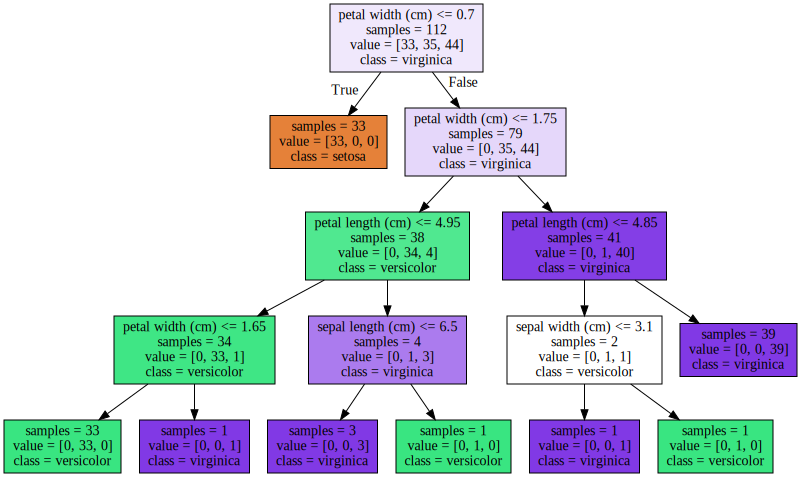

In [11]:
with open('arbol.dot') as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

<function matplotlib.pyplot.show>

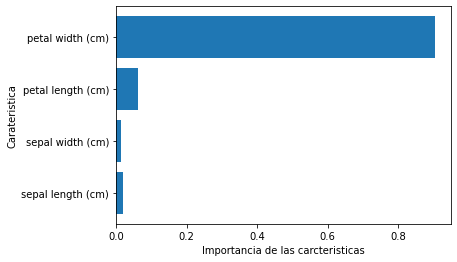

In [12]:
caract=iris.data.shape[1]
plt.barh(range(caract), arbol.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las carcteristicas')
plt.ylabel('Carateristica')
plt.show

In [13]:
arbol=DecisionTreeClassifier(max_depth=3)

In [14]:
arbol.fit(X_entrenamiento,y_entrenamiento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
arbol.score(X_test,y_test)

0.9473684210526315

In [16]:
arbol.score(X_entrenamiento,y_entrenamiento)

0.9732142857142857

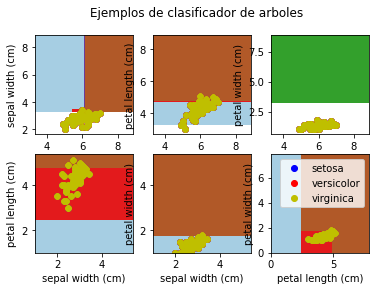

In [19]:
n_classes=3
plot_colors="bry"
plot_step=0.02

for pairidx, pair in enumerate([[0,1], [0,2], [0,3],
                                [1,2], [1,3], [2,3]]):
  X=iris.data[:, pair]
  y=iris.target

  #Entrenar algoritmo
  clf=DecisionTreeClassifier(max_depth=3).fit(X, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min()-1,X[:,0].max()+1
  y_min, y_max = X[:, 0].min()-1,X[:,0].max()+1
  xx, yy=np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
  
  Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z=Z.reshape(xx.shape)
  cs=plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])
  plt.axis('tight')

  for i, color in zip(range(n_classes), plot_colors):
    idx=np.where(y==1)
    plt.scatter(X[idx,0],X[idx,1], c=color, label=iris.target_names[i], 
                cmap=plt.cm.Paired)
    plt.axis('tight')

plt.suptitle("Ejemplos de clasificador de arboles")
plt.legend()
plt.show()